#### Data In Motion
# Pandas Weekly Challenge - Week 5
by Vaibhav Shaharwale

LinkedIn : https://www.linkedin.com/in/vaibhav-shaharwale-65460b177/

Challenge Questions

1.    Set PassengerId as the index.
2.    Create a pie chart presenting the male/female as proportions
3.    Create a scatterplot with the Fare payed and the Age, differ the plot color by gender
4.    How many people survived?
5.    Create a histogram with the Fare payed
6.    Show the number of people Survived and Died per Class with Male/Female Count

In [1]:
import pandas as pd
data_import = pd.read_csv('https://buff.ly/3Oq1aT6 ')

In [2]:
data_import.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
data_import.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
data_import.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
data_import.duplicated().sum()

0

# 1. Set PassengerId as the index.

In [6]:
data_import.set_index('PassengerId', inplace=True)
data_import.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 2. Create a pie chart presenting the male/female as proportions

<AxesSubplot:ylabel='Sex'>

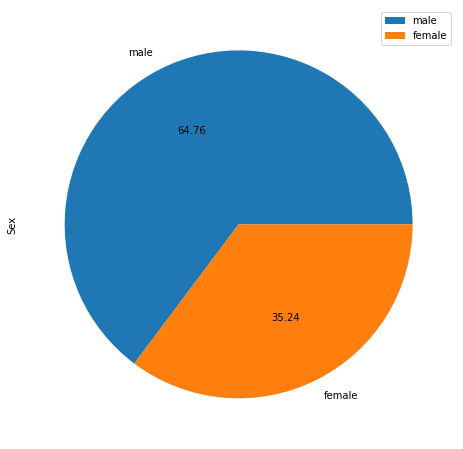

In [7]:
pd.DataFrame(data_import.Sex.value_counts()).plot.pie(y='Sex', autopct='%.2f', figsize=(8,8))

# 3. Create a scatterplot with the Fare payed and the Age, differ the plot color by gender

[Text(0.5, 1.0, 'Fare vs Age')]

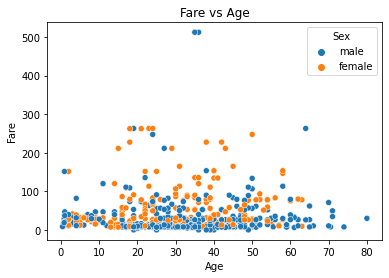

In [8]:
import seaborn as sns
sns.scatterplot(data=data_import, y='Fare', x='Age', hue='Sex').set(title='Fare vs Age')

# 4. How many people survived?

In [9]:
len(data_import[data_import['Survived']==1])

342

Total 342 people survived out of 891.

# 5. Create a histogram with the Fare payed

<AxesSubplot:ylabel='Frequency'>

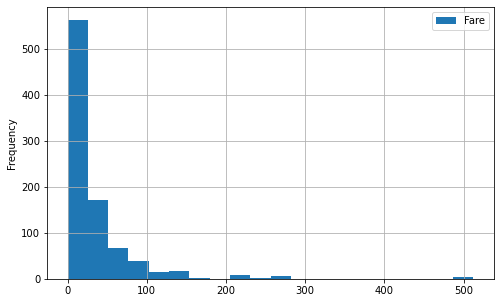

In [10]:
data_import.plot.hist(column='Fare', bins=20, grid=True, figsize=(8,5))

# 6. Show the number of people Survived and Died per Class with Male/Female Count

In [11]:
data_import.groupby(['Pclass', 'Survived']).Sex.value_counts()

Pclass  Survived  Sex   
1       0         male       77
                  female      3
        1         female     91
                  male       45
2       0         male       91
                  female      6
        1         female     70
                  male       17
3       0         male      300
                  female     72
        1         female     72
                  male       47
Name: Sex, dtype: int64